# Introduction to Scipy: Fitting data

We have talked about the Numpy and Matplotlib libraries, but there is a third library that is invaluable for Scientific Analysis: [Scipy](http://www.scipy.org). Scipy is basically a very large library of functions that you can use for scientific analysis. A good place to start to find out about the top-level scientific functionality in Scipy is the [Documentation](http://docs.scipy.org/doc/scipy/reference/).

Examples of the functionality include:

* Integration (scipy.integrate)
* Optimization/Fitting (scipy.optimize)
* Interpolation (scipy.interpolate)
* Fourier Transforms (scipy.fftpack)
* Signal Processing (scipy.signal)
* Linear Algebra (scipy.linalg)
* Spatial data structures and algorithms (scipy.spatial)
* Statistics (scipy.stats)
* Multi-dimensional image processing (scipy.ndimage)

and so on.

This week, we will take a look at how to fit models to data. When analyzing scientific data, fitting models to data allows us to determine the parameters of a physical system (assuming the model is correct).

There are a number of routines in Scipy to help with fitting, but we will use the simplest one, ``curve_fit``, which is imported as follows:

In [1]:
import numpy as np
from scipy.optimize import curve_fit

The full documentation for the ``curve_fit`` is available [here](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit), and we will look at a simple example here, which involves fitting a straight line to a dataset.

We first create a fake dataset with some random noise:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

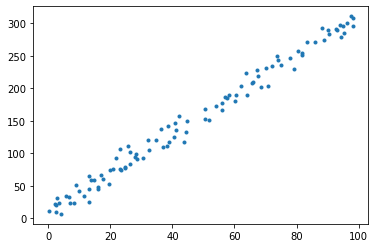

In [3]:
x = np.random.uniform(0., 100., 100)
y = 3. * x + 10. + np.random.normal(0., 10., 100)
plt.plot(x, y, '.')

Let's now imagine that this is real data, and we want to determine the slope (a) and intercept (b) of the best-fit line to the data. We start off by definining a function representing the model:

In [4]:
def line(x, a, b):
    return a * x + b

The arguments to the function should be ``x``, followed by the parameters. We can now call ``curve_fit`` to find the best-fit parameters using a least-squares fit:

In [5]:
popt, pcov = curve_fit(line, x, y)

The ``curve_fit`` function returns two items, which we can ``popt`` and ``pcov``. The ``popt`` argument are the best-fit paramters for ``a`` and ``b``:

In [6]:
popt

array([ 3.01373702, 10.45116296])

which is close to the initial values of ``3`` and ``10`` used in the definition of ``y``.

The reason the values are not exact is because there are only a limited number of random samples, so the best-fit slope is not going to be exactly those used in the definition of ``y``. The ``pcov`` variable contains the *covariance* matrix, which indicates the uncertainties and correlations between parameters. This is mostly useful when the data has uncertainties.

Let's now try and fit the data assuming each point has a vertical error (standard deviation) of +/-10:

<ErrorbarContainer object of 3 artists>

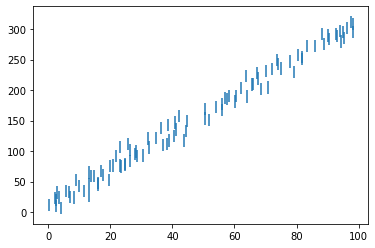

In [7]:
e = np.repeat(10., 100)
plt.errorbar(x, y, yerr=e, fmt="none")

In [8]:
popt, pcov = curve_fit(line, x, y, sigma=e)

In [9]:
popt

array([ 3.01373702, 10.45116305])

Now ``pcov`` will contain the true variance and covariance of the parameters, so that the best-fit parameters are:

In [10]:
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)

a = 3.013737023201044 +/- 0.03584884022055666
b = 10.451163046558111 +/- 1.9812596645442084


We can now plot the best-fit line:

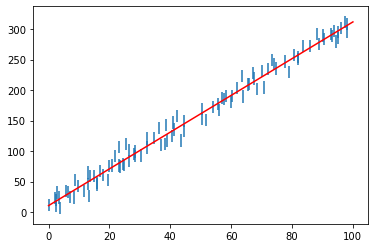

In [11]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 100., 100)  # define values to plot the function for # used to make line fit look good
plt.plot(xfine, line(xfine, popt[0], popt[1]), 'r-')

You should now be able to fit simple models to datasets! Note that for more complex models, more sophisticated techniques may be required for fitting, but ``curve_fit`` will be good enough for most simple cases.

Note that there is a way to simplify the call to the function with the best-fit parameters, which is:

    line(x, *popt)

The * notation will expand a list of values into the arguments of the function. This is useful if your function has more than one or two parameters. Hence, you can do:

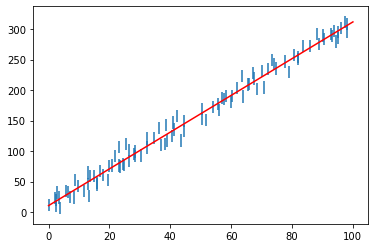

In [12]:
plt.errorbar(x, y, yerr=e, fmt="none")
plt.plot(xfine, line(xfine, *popt), 'r-') # a and b *popt comes from curve fit from where it predetermined a and b
#curvefit is not designed to hangle error for the y-axis. There is the possiblity of bias
#different errors show bias in code. that it is favoring one point over the other

**Important Note:** the way ``curve_fit`` determines the uncertainty is to actually renormalize the errors so that the reduced $\chi^2$ value is one, so the magnitude of the errors doesn't matter, only the relative errors. In some fields of science (such as astronomy) we do *not* renormalize the errors, so for those cases you can specify ``absolute_sigma=True`` in order to preserve the original errors.

## Exercise 1

In the following code, we generate some random data points:

In [13]:
x = np.random.uniform(0., 10., 100)
y = np.polyval([1, 2, -3], x) + np.random.normal(0., 10., 100)
e = np.random.uniform(5, 10, 100)

Fit a line and a parabola to it and overplot the two models on top of the data:

[ 12.28936525 -20.84809334] [ 1.08430938  1.13261089 -1.37286715]
al = 12.28936524543411 +/- 0.4389533919318385
bl = -20.848093339401856 +/- 2.5811187301165925
ap = 1.084309379928061 +/- 0.12842681955522106
bp = 1.1326108930659298 +/- 1.3632145087424887
cp = -1.3728671522382025 +/- 3.0332187112684035


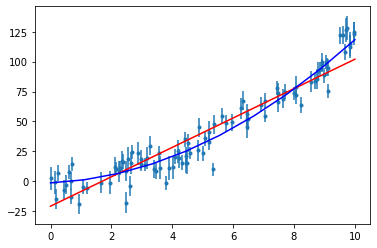

In [14]:
def line(x, a, b):
    return a * x + b
def parab(x,a,b,c):
    return (a*(x**2)+(b*x)+c)
plt.plot(x,y,'.')
plt.errorbar(x,y,yerr=e,fmt="none")
popt,pcov =curve_fit(line,x,y,sigma=e)
popp,povp=curve_fit(parab,x,y,sigma=e)
print(popt,popp)
print("al =", popt[0], "+/-", pcov[0,0]**0.5)
print("bl =", popt[1], "+/-", pcov[1,1]**0.5)
print("ap =", popp[0],"+/-",povp[0,0]**0.5)
print("bp =",popp[1],"+/-",povp[1,1]**0.5)
print("cp =",popp[2],"+/-",povp[2,2]**0.5)

xval=np.linspace(0,10,10)
plt.plot(xval,line(xval,*popt),'r-')
plt.plot(xval,parab(xval,*popp),'b-') #thrid variable point is the color
#feed linespace with the values of the parabola to fit into the parabola rather than curve fit


## Exercise 2

As before, we use the [data/munich_temperatures_average_with_bad_data.txt](data/munich_temperatures_average_with_bad_data.txt) file, which gives the temperature in Munich every day for several years:

Fit the following function to the data:

$$f(t) = a~\cos{(2\pi t + b)} + c$$

where $t$ is the time in years. Make a plot of the data and the best-fit model in the range 2008 to 2012. What are the best-fit values of the parameters? What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year? What is the meaning of the ``b`` parameter, and does its value make sense?

a:  -9.95518358310611 +/- 0.06586555743724057
b:  12.313405907533175 +/- 0.006655057706380808


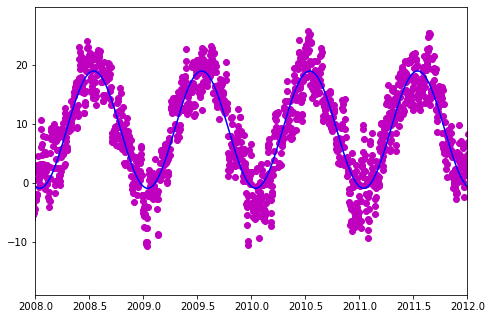

In [15]:
import numpy as np
import math
date, temp = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = np.abs(temp) < 90
#keeper=((date>=2008)&(date<=2012))
fig=plt.figure()
a1=fig.add_axes([0,0,1,1])
#plt.plot(date,temp)
a1.set_xlim(2008,2012)
date = date[keep] #x
temp = temp[keep]
plt.scatter(date,temp,c='m')
def ft(t,a,b,c):
    return (a*np.cos((2*math.pi*t)+b)+c)
# your solution here

#plt.errorbar(date,temp,yerr=e,fmt="none")
pop, pcov =curve_fit(ft,date,temp)
print("a: ",pop[0],"+/-",pcov[0,0]**0.5)
print("b: ",pop[1],"+/-",pcov[1,1]**0.5)
plt.plot(date,ft(date,*pop),'b-')
#timeval=np.linespace(2008,2012,1)

#dates from 2008 and 2012